In [1]:
!pip install openpyxl

# Importing the necessary libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import openpyxl
import seaborn as sns


%matplotlib inline

In [3]:
import os
os.getcwd()

'/Users/ozgurcoban/Downloads/knnHomework_week6/3'

In [4]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
data= pd.read_excel('data/Pumpkin_Seeds_Dataset.xlsx')

# Exploratory Data Analysis

In [6]:
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


All the features have numerical values. The target variable has string values.

In [8]:
data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


# Setting Style for all the Figures

In [9]:
sns.set(style = 'whitegrid' ,font = 'Arial', font_scale = 1.1, rc={'axes.facecolor':'#ffffff', 'figure.facecolor':'#ffffff',
                                                                   "axes.spines.right": False, "axes.spines.top": False})

# Countplot for the target
As we can see there are 2 classes and both of the classes have almost equal values

Text(0.5, 1.0, 'Countplot for the 2 Classes')

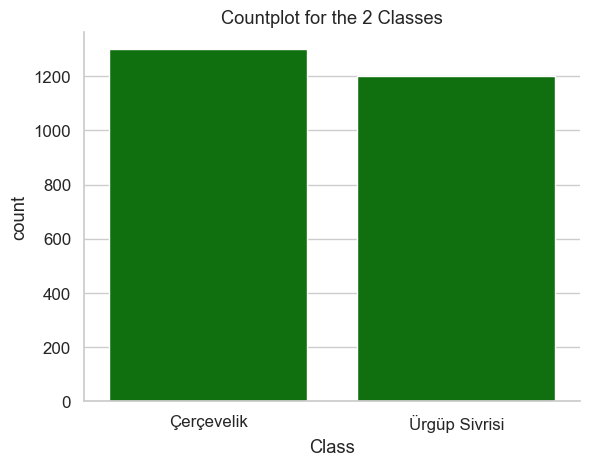

In [10]:
a = sns.countplot(x = 'Class', data = data, color = 'Green')
a.set_title('Countplot for the 2 Classes')

In [11]:
data['Class'].value_counts()

Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: Class, dtype: int64

# BoxPlots for all featues

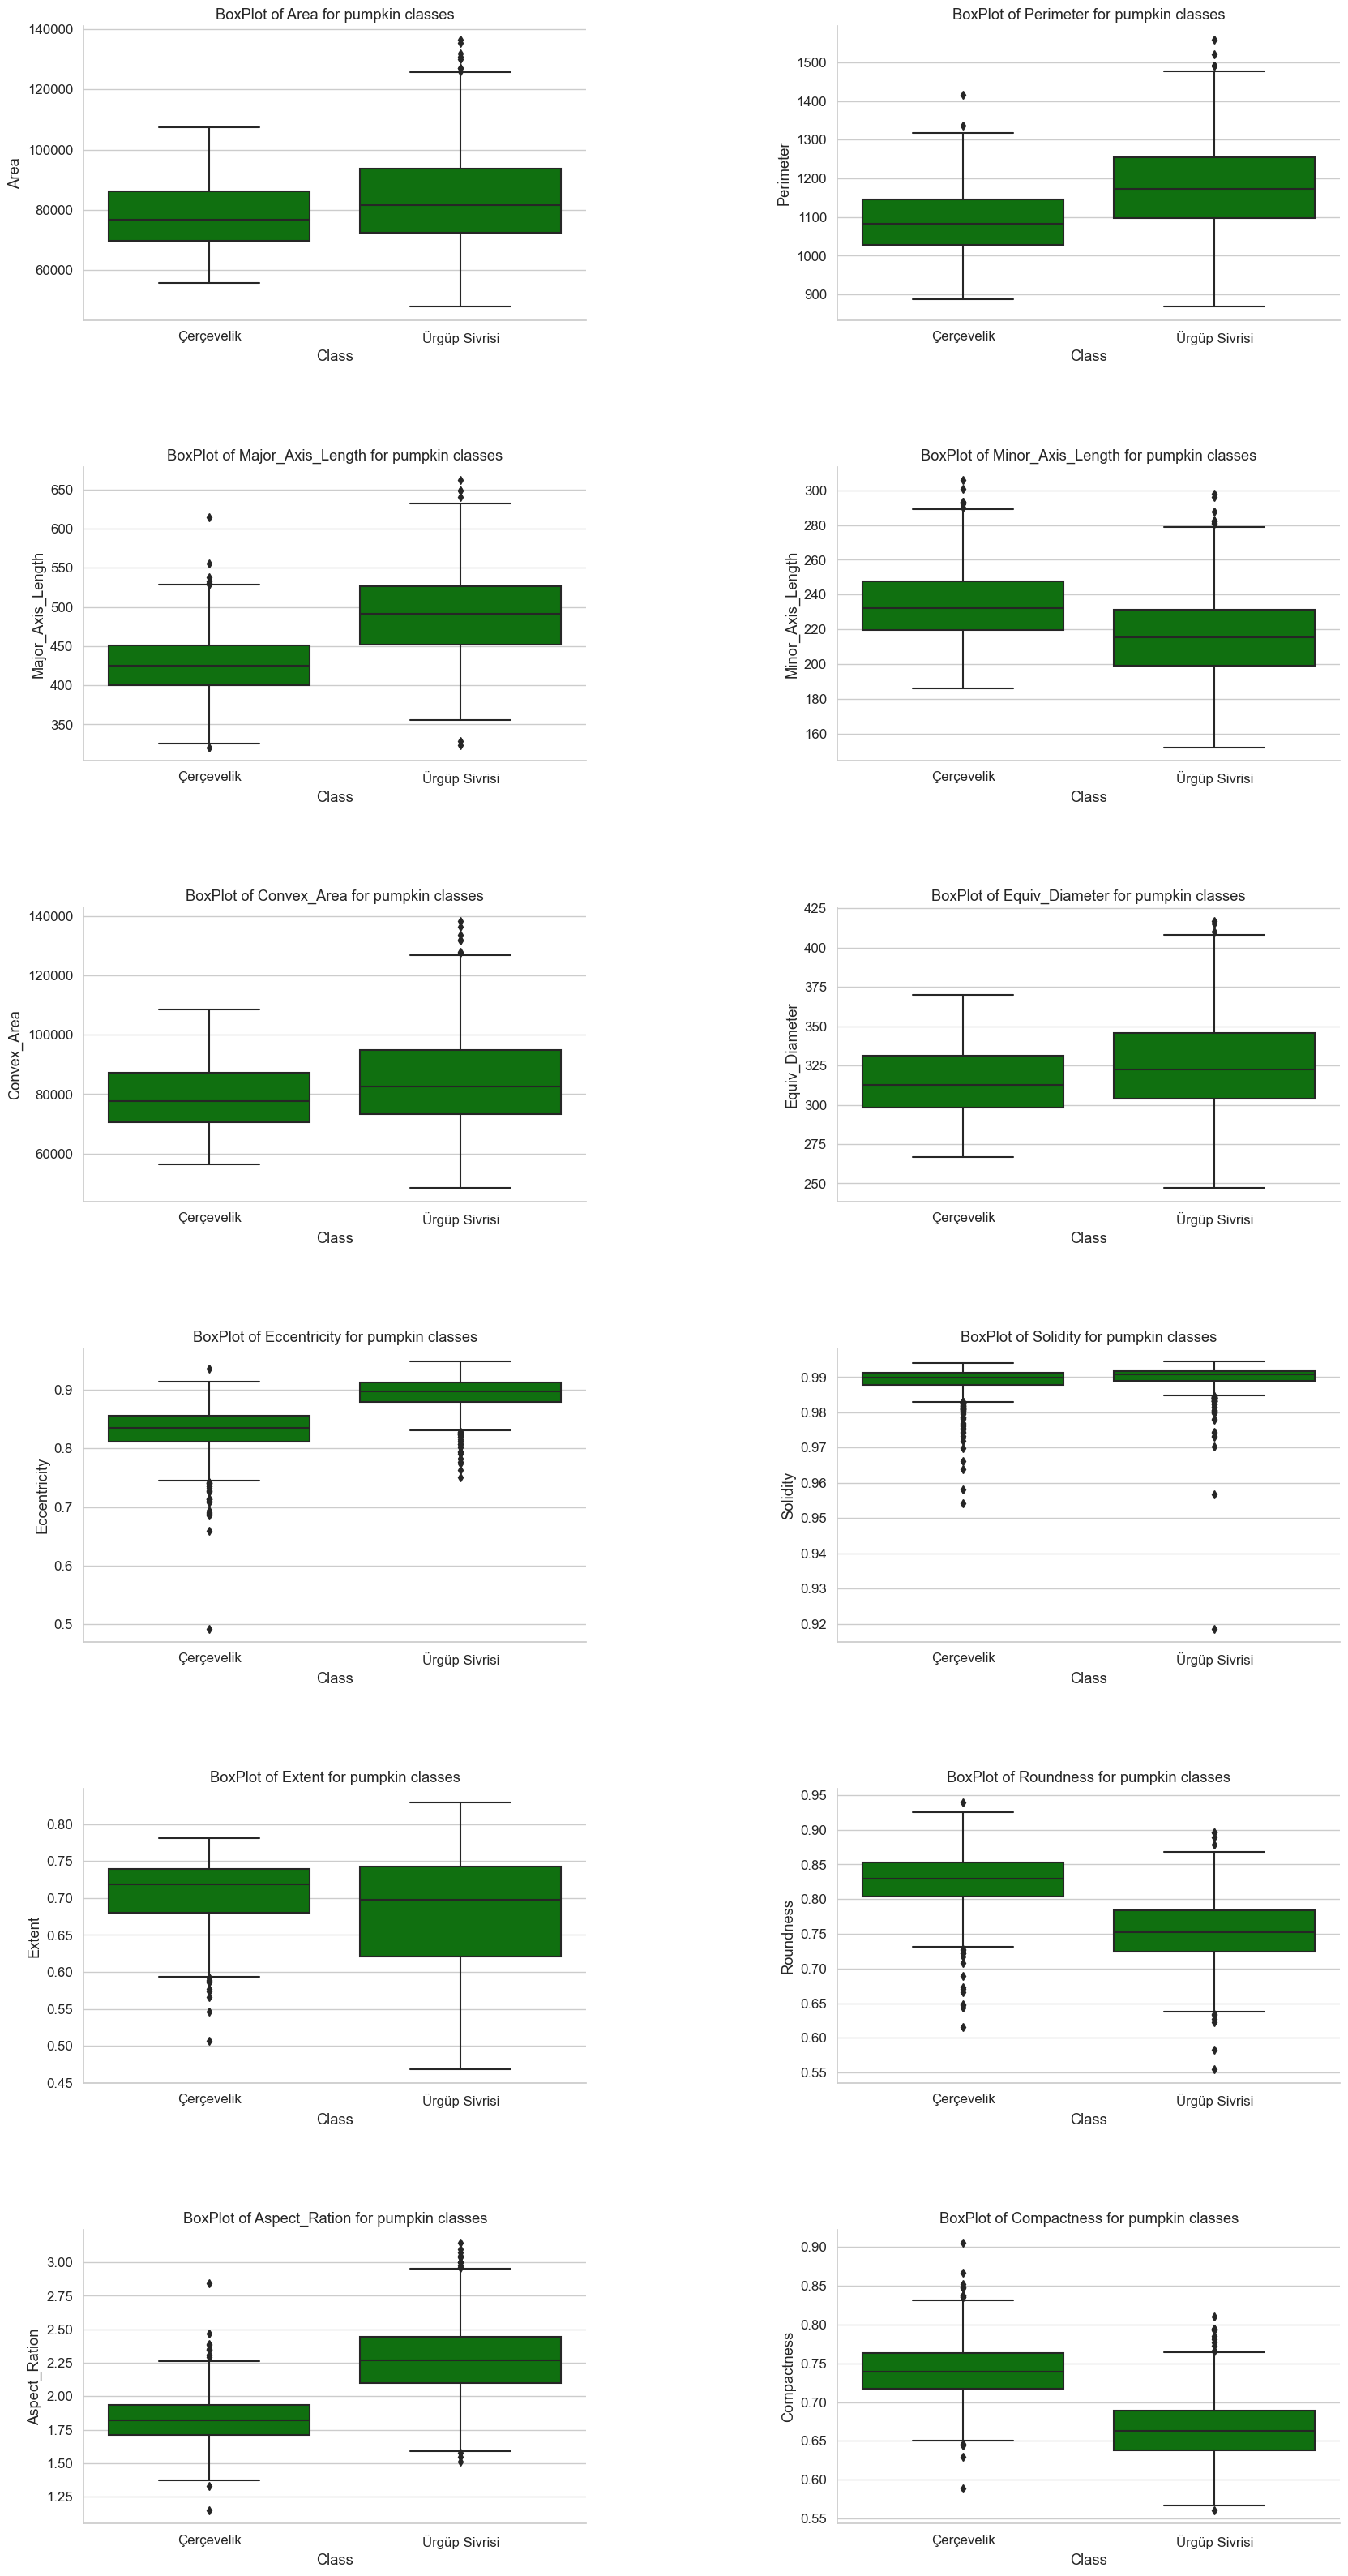

In [12]:
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (20, 40))
for nr, c in enumerate(data.columns):
    if c!= 'Class':
        sns.boxplot(data = data, x = 'Class', y = c, ax = axes[nr // 2, nr % 2], color = 'Green')
        axes[nr // 2, nr % 2].set_title('BoxPlot of ' + c + ' for pumpkin classes')
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

As seen in the figures above. We can draw certain conclusions

1.Both the Classes of Pumpkin have different set of values for almost all features except one.

2.The solidity feature is of less importance for us, because the set of values for both classes are same for Solidity.

3.Based on this observation we can drop the solidity column as it is no a distinguishing feature.

# Seperating into Features and Labels

In [13]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [14]:
X.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness'],
      dtype='object')

In [15]:
cols= X.columns
cols

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness'],
      dtype='object')

# CountPlot for all features

In [16]:
def plot(i, c):
    minm = X[c].min()
    maxm = X[c].max()
    q = (maxm - minm) / 5
    arr = [minm, (minm + q), (minm + 2 * q), (minm + 3 * q), (minm + 4 * q), (minm + 5 * q)]
    a = sns.countplot(x = pd.cut(X[c], arr), data = X, color = 'Green', ax = axes[(i // 2), (i % 2)])
    a.set_title('Countplot for ' + c)

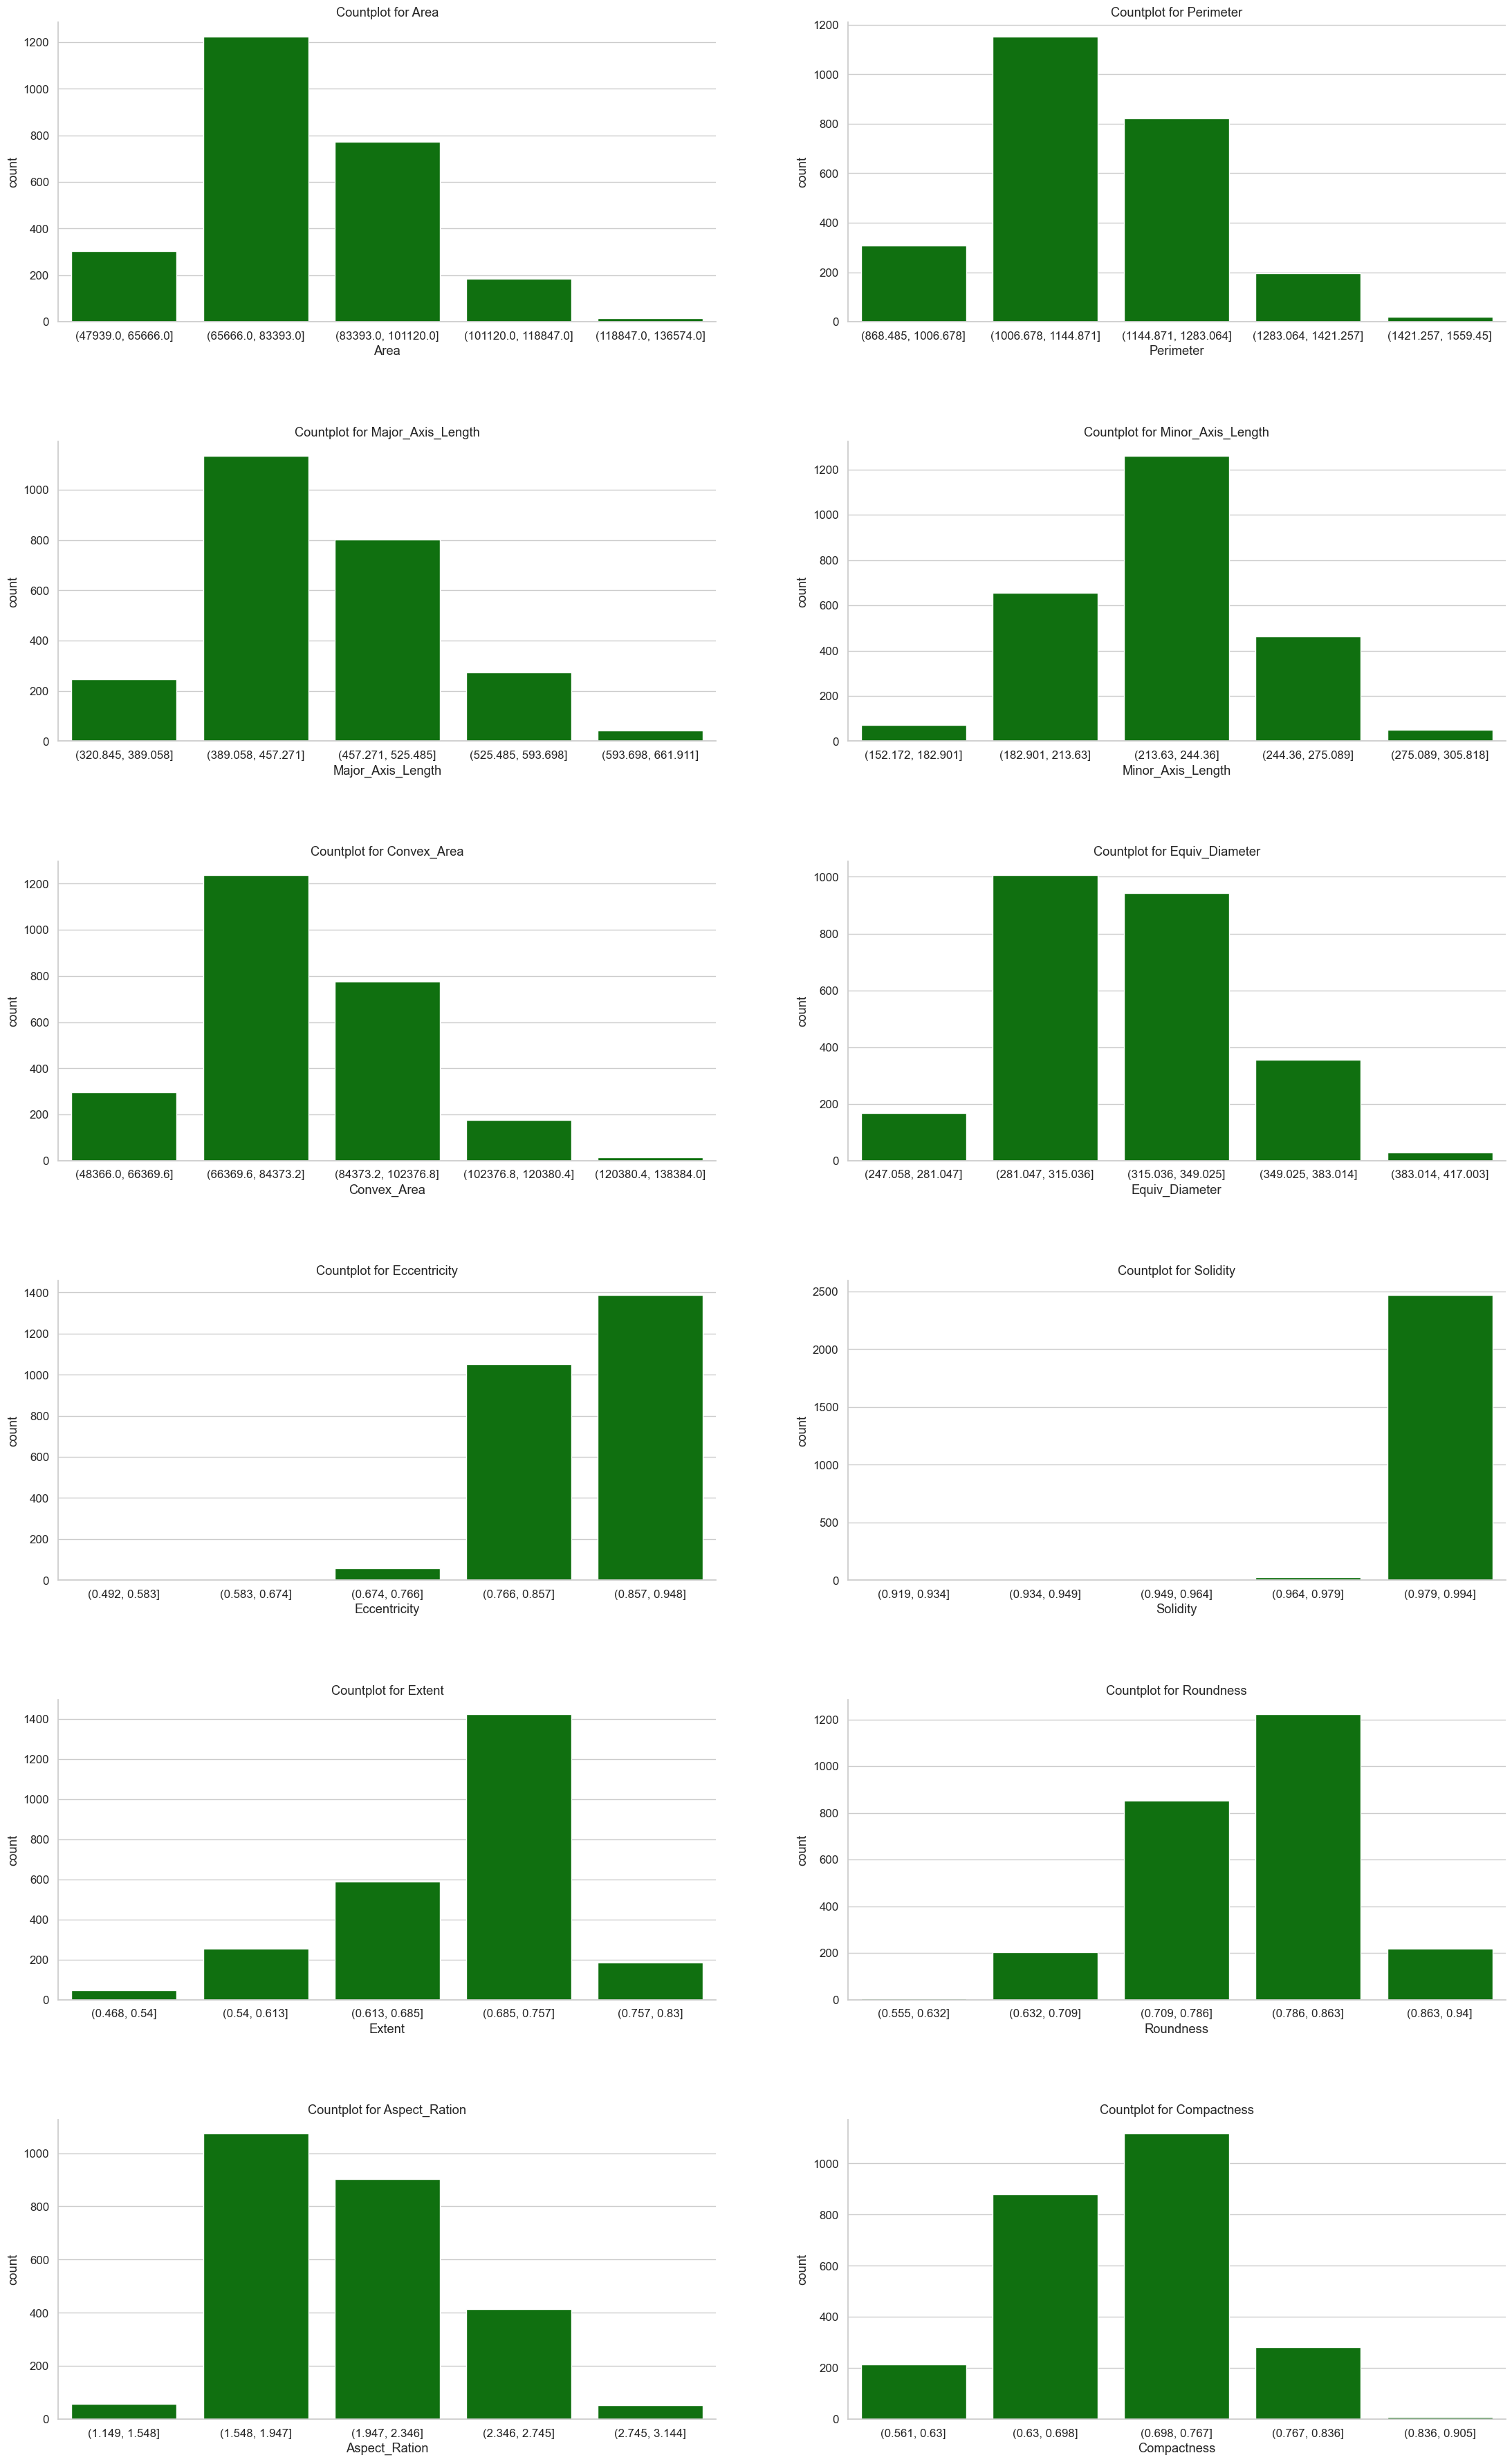

In [17]:
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (27, 45))
for i in range(12):
    b = cols[i]
    plot(i, b)
plt.subplots_adjust(hspace = 0.4, wspace = 0.2)

Based on the counplots we can draw conclusions as given below.

All the classes have well distributed values.

The solidity values are highly skewed and belong in a certain small region only

# Correlation plot for all features

In [18]:
corr = X.corr()
corr.style.background_gradient('coolwarm')

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
Area,1.000000,0.928548,0.789133,0.685304,0.999806,0.998464,0.159624,0.158388,-0.014018,-0.149378,0.159960,-0.160438
Perimeter,0.928548,1.000000,0.946181,0.392913,0.929971,0.928055,0.464601,0.065340,-0.140600,-0.500968,0.487880,-0.484440
Major_Axis_Length,0.789133,0.946181,1.000000,0.099376,0.789061,0.787078,0.704287,0.119291,-0.214990,-0.684972,0.729156,-0.726958
Minor_Axis_Length,0.685304,0.392913,0.099376,1.000000,0.685634,0.690020,-0.590877,0.090915,0.233576,0.558566,-0.598475,0.603441
Convex_Area,0.999806,0.929971,0.789061,0.685634,1.000000,0.998289,0.159156,0.139178,-0.015449,-0.153615,0.159822,-0.160432
Equiv_Diameter,0.998464,0.928055,0.787078,0.690020,0.998289,1.000000,0.156246,0.159454,-0.010970,-0.145313,0.155762,-0.156411
Eccentricity,0.159624,0.464601,0.704287,-0.590877,0.159156,0.156246,1.000000,0.043991,-0.327316,-0.890651,0.950225,-0.981689
Solidity,0.158388,0.065340,0.119291,0.090915,0.139178,0.159454,0.043991,1.000000,0.067537,0.200836,0.026410,-0.019967
Extent,-0.014018,-0.140600,-0.214990,0.233576,-0.015449,-0.010970,-0.327316,0.067537,1.000000,0.352338,-0.329933,0.336984
Roundness,-0.149378,-0.500968,-0.684972,0.558566,-0.153615,-0.145313,-0.890651,0.200836,0.352338,1.000000,-0.935233,0.933308


As seen in the correlation plot, we can conclude

   Area feature has a very high correlation with Convex_Area and    Equiv_Diameter features

   Eccentricity and Aspect_Ration have a high correlation

   Major_Axis_length has a high correlation with Perimeter.

   We will try to train model after dropping the features of       Convex_Area and Solidity

In [19]:
X1 = X.drop(columns = ['Solidity', 'Convex_Area'], axis = 1)
y1 = data['Class']
X1.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Equiv_Diameter,Eccentricity,Extent,Roundness,Aspect_Ration,Compactness
0,56276,888.242,326.1485,220.2388,267.6805,0.7376,0.7453,0.8963,1.4809,0.8207
1,76631,1068.146,417.1932,234.2289,312.3614,0.8275,0.7151,0.8440,1.7811,0.7487
2,71623,1082.987,435.8328,211.0457,301.9822,0.8749,0.7400,0.7674,2.0651,0.6929
3,66458,992.051,381.5638,222.5322,290.8899,0.8123,0.7396,0.8486,1.7146,0.7624
4,66107,998.146,383.8883,220.4545,290.1207,0.8187,0.6752,0.8338,1.7413,0.7557


# Model Selection

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2)

# Functions for Model Evaluation

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:
def model_evaluation(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt = '')
    y_pred = classifier.predict(X_test)
    yt_pred = classifier.predict(X_train)
    print('The Training Accuracy of the algorithm is ', accuracy_score(y_train, yt_pred))
    print('The Testing Accuracy of the algorithm is ', accuracy_score(y_test, y_pred))
    return [(accuracy_score(y_train * 100, yt_pred * 100) * 100), (accuracy_score(y_test * 100, y_pred * 100) * 100)]

In [25]:
def model_evaluation1(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X1_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot = labels, cmap = 'Blues', fmt = '')
    y1_pred = classifier.predict(X1_test)
    yt1_pred = classifier.predict(X1_train)
    print('The Training Accuracy of the algorithm is ', accuracy_score(y1_train, yt1_pred))
    print('The Testing Accuracy of the algorithm is ', accuracy_score(y1_test, y1_pred))
    return [(accuracy_score(y1_train, yt1_pred) * 100), (accuracy_score(y1_test, y1_pred) * 100)]

# Note
All the models here after will be evaluated on 2 datasets.

The first dataset is the one where no column is dropped and the confusion matrix will be plotted in Green Colour.

The secodn dataset is the one where some columns are dropped to try improve the accuracy and the confusion matrix for this data will be plotted in Blue Colour.

# K Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier

The Training Accuracy of the algorithm is  0.7675
The Testing Accuracy of the algorithm is  0.704


[76.75, 70.39999999999999]

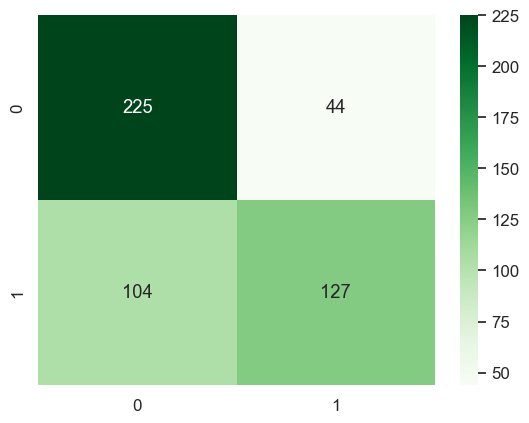

In [27]:
knn = KNeighborsClassifier(10, weights = 'uniform', metric = 'manhattan')
knn.fit(X_train, y_train)
model_evaluation(knn)

The Training Accuracy of the algorithm is  0.8115
The Testing Accuracy of the algorithm is  0.756


[81.15, 75.6]

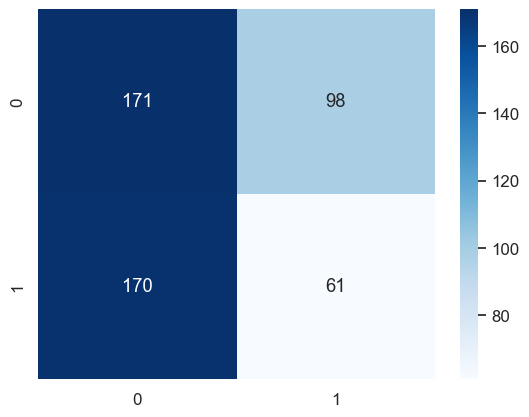

In [28]:
knn1 = KNeighborsClassifier(10, weights = 'uniform', metric = 'manhattan')
knn1.fit(X1_train, y1_train)
model_evaluation1(knn1)